# Análisis Exploratorio de Datos (EDA) – ASTRO vs DM

Este notebook realiza un análisis exploratorio del conjunto de datos `XY_bal_log_Rel.txt`, que contiene fuentes astrofísicas identificadas (ASTRO) y simulaciones de materia oscura (DM, Dark Matter). El objetivo es entender la estructura de los datos y estudiar el comportamiento de sus variables principales antes de realizar cualquier preprocesamiento o modelado, es decir explorar las características principales del dataset, identificar patrones útiles y preparar los datos para su uso en modelos de aprendizaje automático.

El análisis se centra en las siguientes variables:

1. **Log(E_peak)** – Logaritmo del pico de energía del espectro gamma.
2. **Log(beta)** – Logaritmo de la curvatura espectral.
3. **Log(sigma)** – Logaritmo de la significancia estadística de detección.
4. **Log(beta_Rel)** – Logaritmo del error relativo de la curvatura.
5. **astro_DM** – Etiqueta de clase: 0 para ASTRO, 1 para DM.

## Carga del dataset original

El archivo original `XY_bal_log_Rel.txt` se encuentra en la carpeta `data/raw/`. Contiene los datos balanceados entre fuentes ASTRO y DM. Se cargan los datos indicando manualmente los nombres de las columnas.

## 🎯 Propósito del EDA

Antes de aplicar cualquier técnica de aprendizaje automático, es fundamental comprender la naturaleza de los datos disponibles. Este análisis tiene los siguientes objetivos específicos:

- Estudiar la **distribución individual de cada feature**, diferenciando entre clases (ASTRO vs DM).
- Explorar **relaciones entre variables**, como correlaciones o agrupamientos visuales.
- Detectar posibles **outliers o patrones** inesperados.
- Evaluar si existen diferencias sustanciales entre las clases que justifiquen el uso de técnicas de clasificación o detección de anomalías.
- Obtener una primera intuición sobre qué características podrían resultar más **discriminativas o relevantes** para el modelado.

---

## 📊 Visualizaciones realizadas

- **Histogramas** por feature, diferenciados por clase (`astro_DM`), para visualizar la distribución.
- **Gráficos de dispersión** (scatter plots) en pares de features clave.
- **Matriz de correlación (heatmap)** para evaluar redundancias o relaciones lineales entre variables.
- **Resumen estadístico** (media, desviación, mínimo, máximo, etc.) por clase.

---

## 🧠 Principales observaciones

- Las distribuciones de `Log(E_peak)` y `Log(beta)` muestran diferencias visibles entre las clases, lo cual sugiere que estas variables podrían ser útiles para la separación entre ASTRO y DM.
- `Log(sigma)` y `Log(beta_Rel)` están más correlacionadas entre sí, posiblemente debido a su relación con la significancia y la precisión espectral.
- En el espacio de características proyectado (por ejemplo en PCA o scatter 2D), las clases no se solapan completamente, lo cual apoya el uso de técnicas como One-Class SVM para identificar fuentes anómalas.

---

## ✅ Justificación para el modelado posterior

A partir de este análisis se concluye que es viable aplicar un modelo de detección de anomalías (como One-Class SVM) usando las variables disponibles. Las observaciones ASTRO muestran un comportamiento relativamente coherente entre sí, mientras que las instancias simuladas (DM) presentan diferencias medibles en varias dimensiones.

Este análisis también permite establecer una **expectativa razonable** sobre qué comportamientos el modelo debería considerar "normales" (ASTRO) y qué patrones se considerarían desviaciones del comportamiento esperado (posibles DM).

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
# Definir nombres de las columnas
features = ['Log(E_peak)', 'Log(beta)', 'Log(sigma)', 'Log(beta_Rel)', 'astro_DM']

# Cargar los datos
df = pd.read_csv('../../data/raw/XY_bal_log_Rel.txt', sep="\s+", names=features, engine='python', skiprows=1)
# df['astro_DM'] = df['astro_DM'].astype(int)

In [238]:
df.head()

,Log(E_peak),Log(beta),Log(sigma),Log(beta_Rel),astro_DM
0,-0.412502,-1.325139,1.356951,-0.122193,0.0
1,0.708140,-0.000174,0.623167,-1.601886,0.0
2,0.224740,-0.581202,1.010041,-0.311249,0.0
3,0.257319,-0.561933,0.615413,-0.038913,0.0
4,0.326110,-1.100179,1.624932,-0.528753,0.0


In [239]:
# Ver estadísticas generales (valores mínimos, máximos, media, desviación estandar, etc.)
print("Estadísticas descriptivas:")
df.describe()

Estadísticas descriptivas:


,Log(E_peak),Log(beta),Log(sigma),Log(beta_Rel),astro_DM
count,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000
mean,1.018241,-0.819062,1.061131,-0.061574,0.500000
std,1.667957,0.413740,0.357026,0.478845,0.500044
min,-5.912006,-2.602060,0.608098,-3.198657,0.000000
25%,-0.086760,-1.093827,0.778414,-0.301915,0.000000
50%,0.883369,-0.805070,0.973677,-0.045029,0.500000
75%,2.302818,-0.502967,1.254676,0.287035,1.000000
max,5.918502,0.000000,2.899104,1.866966,1.000000


In [240]:
# Ver los valores de correlación entre variables
print("Matriz de correlación entre variables:")
df.corr()

Matriz de correlación entre variables:


,Log(E_peak),Log(beta),Log(sigma),Log(beta_Rel),astro_DM
Log(E_peak),1.000000,0.108252,-0.116761,0.355409,0.662491
Log(beta),0.108252,1.000000,-0.106935,-0.294714,0.280305
Log(sigma),-0.116761,-0.106935,1.000000,-0.347368,-0.143709
Log(beta_Rel),0.355409,-0.294714,-0.347368,1.000000,0.329702
astro_DM,0.662491,0.280305,-0.143709,0.329702,1.000000


# 📊 Gráficas

## 📌 Histogramas individuales de cada feature

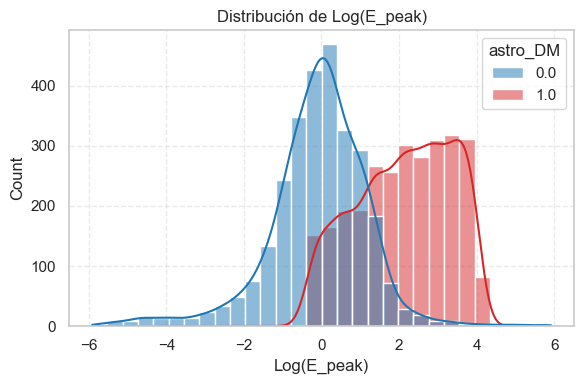

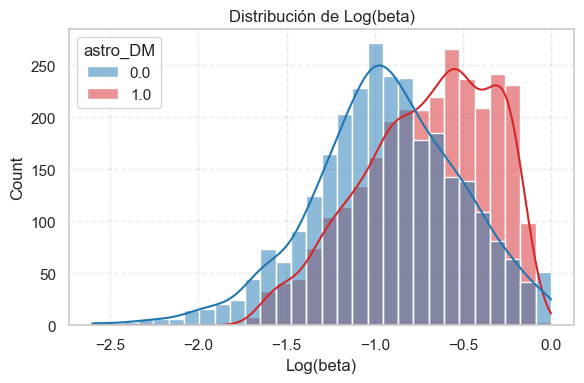

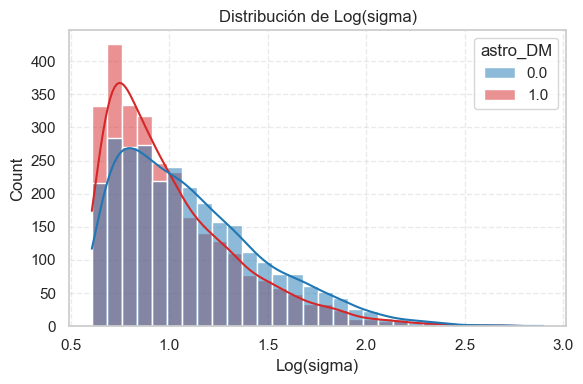

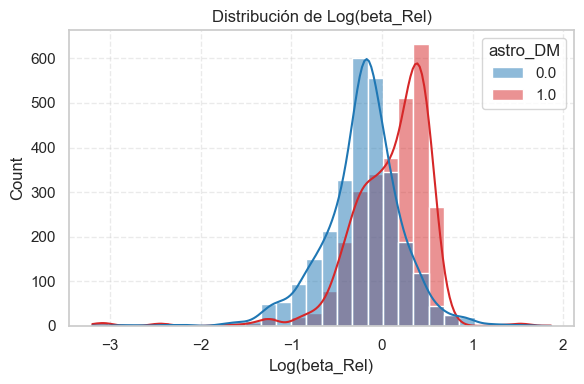

In [241]:
# Histograma por feature y clase
# Definir paleta personalizada
custom_palette = {
    0: '#1f77b4',  # Azul (ASTRO)
    1: '#d62728'   # Rojo (DM)
}

# Histograma por feature y clase
for col in df.columns[:-1]:  # sin la columna de clase
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='astro_DM', kde=True, bins=30, palette=custom_palette)
    plt.title(f'Distribución de {col}')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


## 📌 Matriz de dispersión

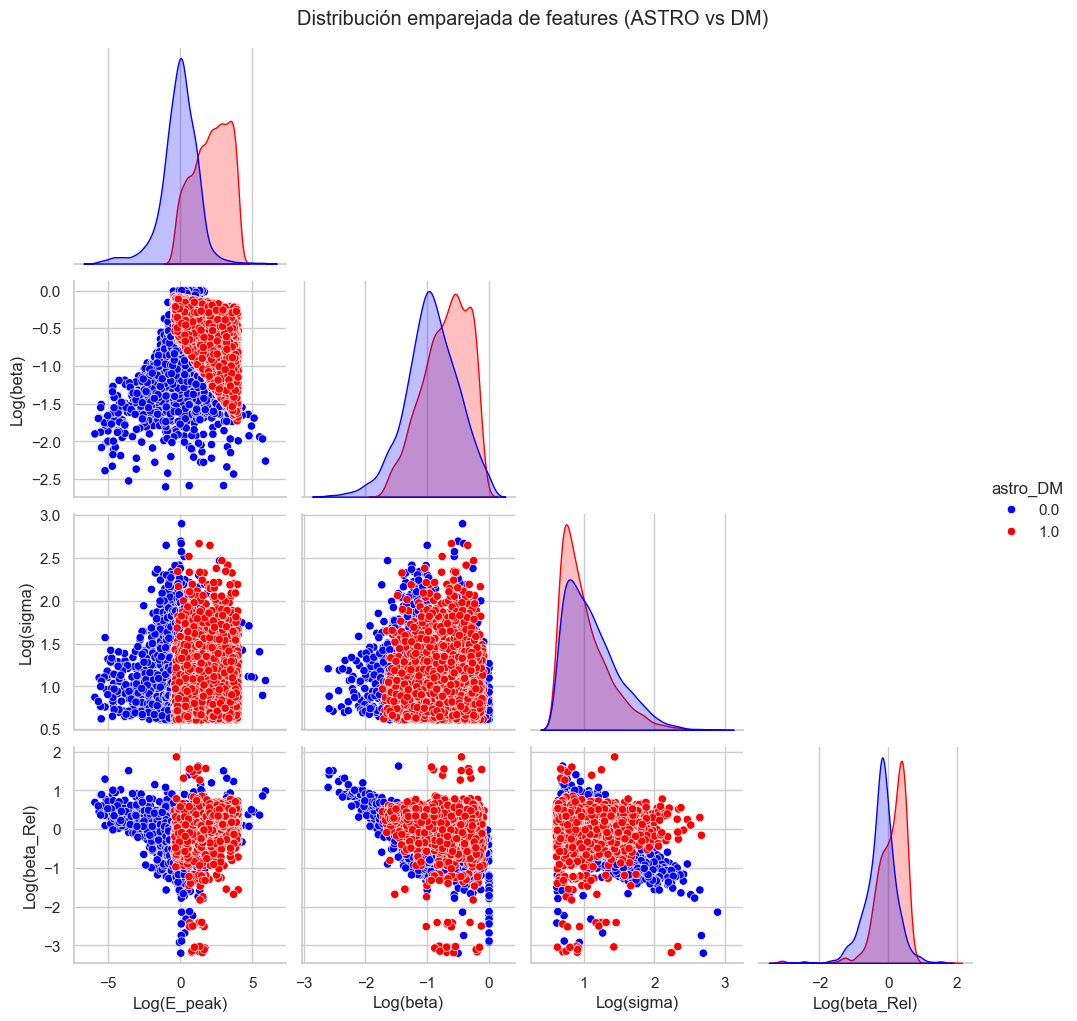

In [242]:
# Matriz de dispersión ((scatter matrix / pairplot))
sns.pairplot(df, hue='astro_DM', palette={0: 'blue', 1: 'red'}, corner=True)
plt.suptitle('Distribución emparejada de features (ASTRO vs DM)', y=1.02)
plt.show()

## 📌 Mapa de correlación (Heatmap)

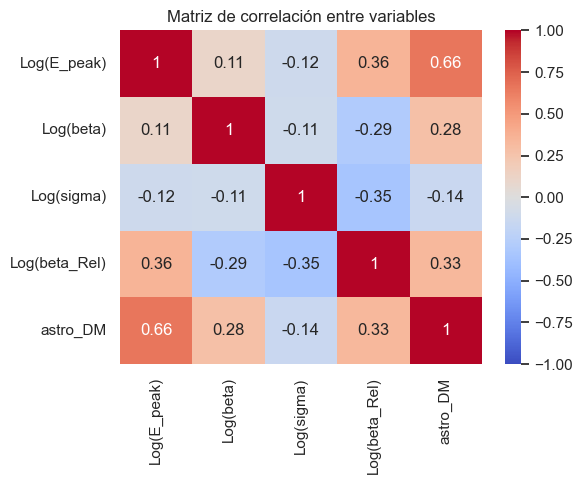

In [243]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación entre variables')
plt.tight_layout()
plt.show()

## 📌 Gráfico de dispersión 2D

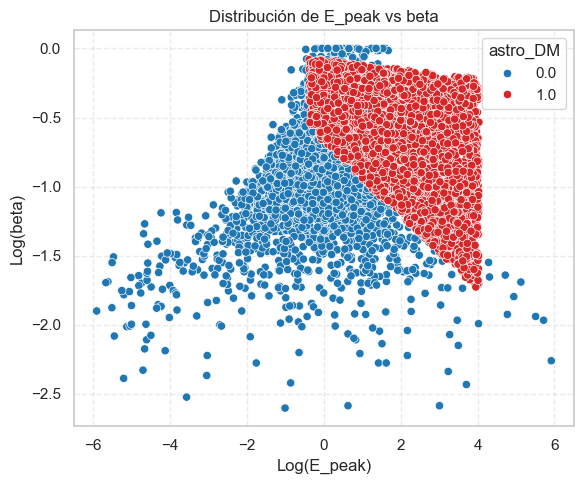

In [244]:
 # Scatteer plot de astro vs DM
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Log(E_peak)', y='Log(beta)', hue='astro_DM', palette=custom_palette)
plt.title('Distribución de E_peak vs beta')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()